In [20]:
import numpy as np

import gensim
from gensim import corpora
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import preprocess_documents

from tensorflow.keras.utils import get_file

In [67]:
#Some imports for computing distances and visualizing data
from sklearn.metrics.pairwise import cosine_similarity
#rom scipy.spatial.distance import cosine


#Data reduction and visualization
from sklearn.manifold import MDS, TSNE
from matplotlib import pyplot as plt

In [419]:
import inspect

In [170]:
#Autobiography
path = get_file('helen1.txt', origin='https://www.gutenberg.org/cache/epub/2397/pg2397.txt')
helen1 = open(path).readlines()

#Find beginning and end of actual book
b = helen1.index('I. THE STORY OF MY LIFE\n')
e = helen1.index('THE END\n')
#Weed out preamble, after-text stuff
helen1 = helen1[b:e]

In [171]:
hpp = preprocess_documents(helen1)

In [172]:
len(hpp)

13188

In [447]:
model = Word2Vec(sentences=hpp, vector_size=50, window=5, min_count=2, workers=4, sg=1, epochs = 1000)

In [401]:
model.train(hpp, total_words = 5889, epochs = 1000)

(48599935, 54875000)

In [409]:
hkkmod = model

In [448]:
model.wv.most_similar('bee')

[('pigeon', 0.5974750518798828),
 ('jakei', 0.5863347053527832),
 ('northern', 0.5598377585411072),
 ('demonstr', 0.5593737363815308),
 ('terrif', 0.5591062903404236),
 ('grandfath', 0.553312361240387),
 ('flight', 0.5530526638031006),
 ('derbi', 0.5528071522712708),
 ('willingli', 0.5521440505981445),
 ('haunt', 0.546334445476532)]

In [449]:
shnames = ['squar','circl','straight','flat','round','line','corner']
sznames = ['big','small','huge','littl','larg','size']
annames = ['dog','cat','sheep','pig','cow','hors','bird','fish','bee','insect']
objnames= ['chair','tabl', 'rug', 'piano','violin','trumpet', 'drum','hat','coat','skirt']
cnames = ['black','white','red','green','blue','purpl','brown','grai','yellow']
pplnames = ['man', 'woman', 'girl','boi','babi','infant','child','person','adult']
#sndnames = ['buzz','clap', 'sing', 'purr', 'whisper', 'thump','shout','hum','quiet','nois']

allnames = []
#allnames.extend(shnames)
#allnames.extend(sznames)
allnames.extend(annames)
#allnames.extend(objnames)
allnames.extend(cnames)
allnames.extend(pplnames)
#allnames.extend(sndnames)


pcols=[]
#pcols = ['red'] * (len(shnames))
#pcols.extend(['blue'] * len(sznames))
pcols.extend(['green'] * len(annames))
#pcols.extend(['gold'] * len(objnames))
pcols.extend(['orange'] * len(cnames))
pcols.extend(['pink'] * len(pplnames))
#pcols.extend(['black'] * len(sndnames))


In [450]:
wvecs = [model.wv[w] for w in allnames]

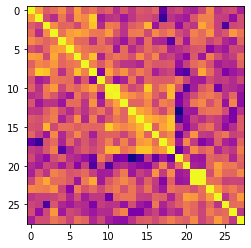

In [451]:
#Compute cosine similarities for all pairs of these 8 words
csim = cosine_similarity(wvecs)
csim[csim > 1] = 1.0
plt.imshow(csim, cmap='plasma', vmax = np.max(np.tril(csim,-1)))

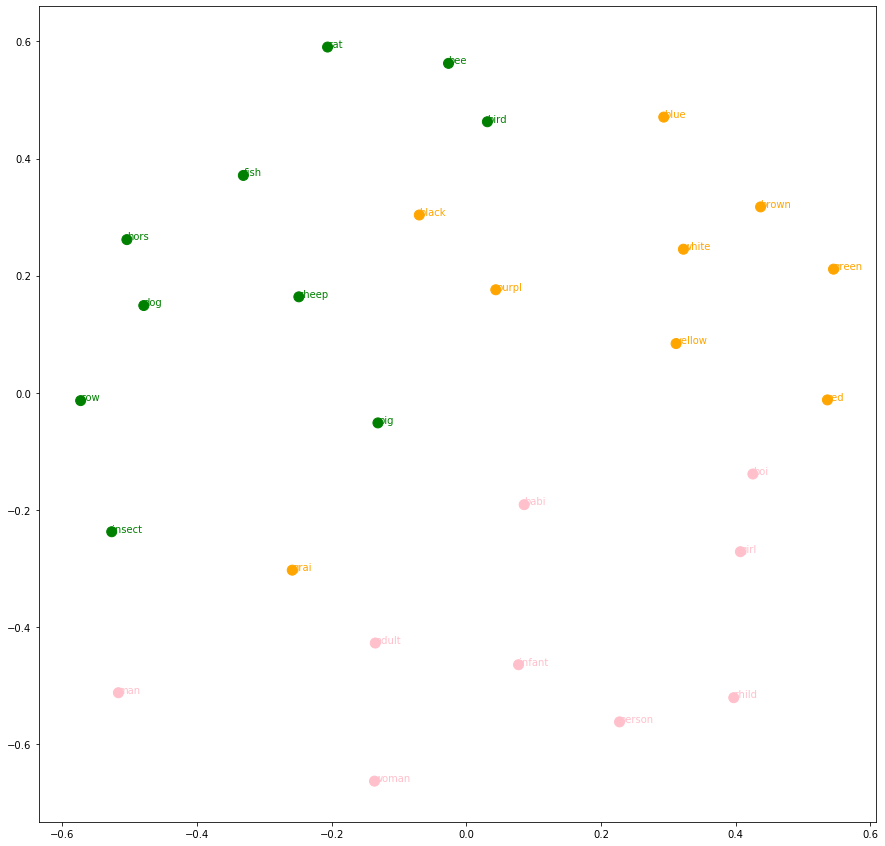

In [452]:
w2d = MDS(n_components=2, dissimilarity='precomputed').fit_transform(1 - csim) #Fit the MDS to cdist data and return 2D coordinates for each item

#Now plot the words in a 2D space with labels.
f = plt.figure(figsize=(15,15))
plt.scatter(w2d[:,0], w2d[:,1], s = 100, c = pcols)

#fig, ax = plt.subplots()#Initialize plot
#ax.scatter(w2d[:,0], w2d[:,1]) #Add scatterplot of points from 2d coordinates
for i, l in enumerate(allnames):   #Annotate each point with word labels
    plt.annotate(l, (w2d[i,0], w2d[i,1]), c = pcols[i])

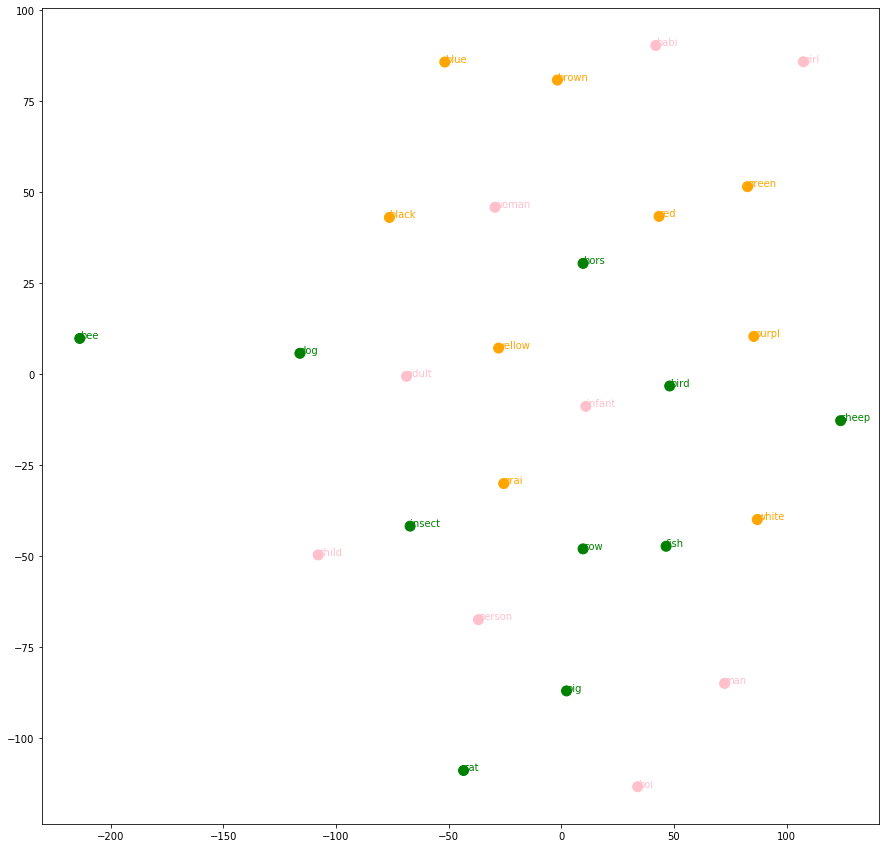

In [453]:
w2d = TSNE(n_components=2, metric='cosine').fit_transform(wvecs) #Fit the MDS to cdist data and return 2D coordinates for each item

#Now plot the words in a 2D space with labels.
f = plt.figure(figsize=(15,15))
plt.scatter(w2d[:,0], w2d[:,1], s = 100, c = pcols)

#fig, ax = plt.subplots()#Initialize plot
#ax.scatter(w2d[:,0], w2d[:,1]) #Add scatterplot of points from 2d coordinates
for i, l in enumerate(allnames):   #Annotate each point with word labels
    plt.annotate(l, (w2d[i,0], w2d[i,1]), c = pcols[i])

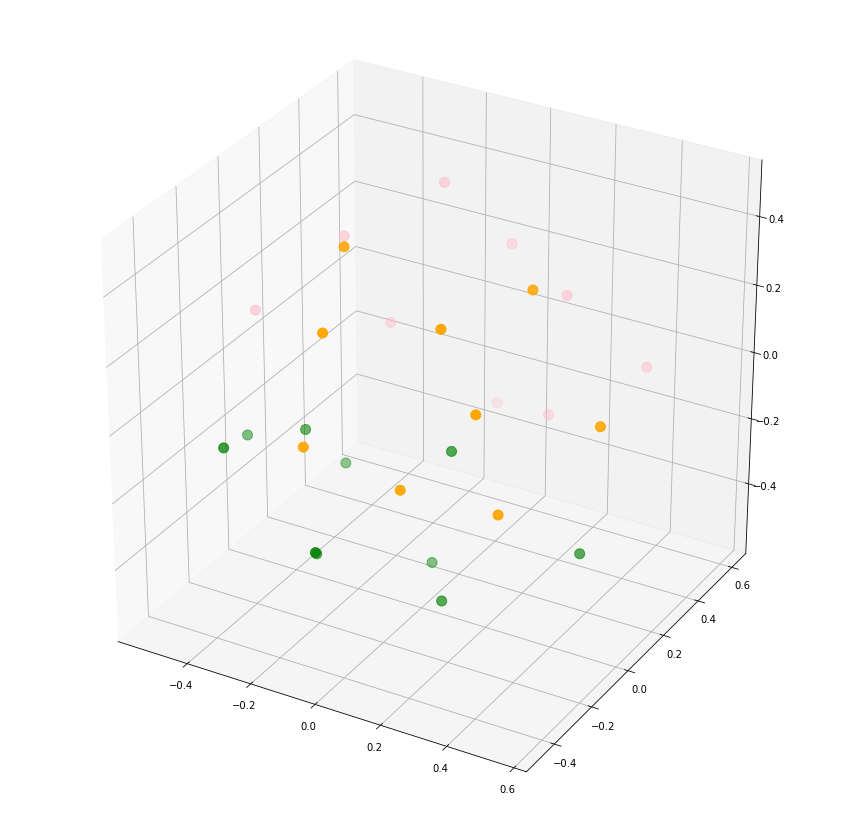

In [454]:
from mpl_toolkits import mplot3d

w3d = MDS(n_components=3,dissimilarity='precomputed').fit_transform(1 - csim) 

f = plt.figure(figsize=(15,15))
ax = f.add_subplot(projection='3d')
ax.scatter3D(w3d[:,0], w3d[:,1], w3d[:,2], s = 100, c = pcols)


## Memoirs by contemporary women

In [466]:
#My Own Story, Emmeline Pankhurst
path = get_file('emmeline1.txt', origin='https://www.gutenberg.org/cache/epub/34856/pg34856.txt')
tmp = open(path).readlines()

#Find beginning and end of actual book
b = tmp.index('CHAPTER I\n')
e = tmp.index('THE END\n')
#Weed out preamble, after-text stuff
tmp = tmp[b:e]

owom = tmp


In [467]:
#Reminiscenses, Elizabeth Cady Stanton
path = get_file('stanton1.txt', origin='https://www.gutenberg.org/cache/epub/11982/pg11982.txt')
tmp = open(path).readlines()

#Find beginning and end of actual book
b = tmp.index('CHAPTER I.\n')
e = tmp.index('INDEX OF NAMES.\n')
#Weed out preamble, after-text stuff
tmp = tmp[b:e]
owom.extend(tmp)

In [471]:
path = get_file('robins1.txt', origin='https://www.gutenberg.org/cache/epub/26420/pg26420.txt')
tmp = open(path).readlines()

#Find beginning and end of actual book
b = tmp.index('CHAPTER I\n')
e = tmp.index('The following pages are advertisements of\n')
#Weed out preamble, after-text stuff
tmp = tmp[b:e]
owom.extend(tmp)

In [472]:
opp = preprocess_documents(owom)
len(opp)

36113

In [475]:
model = Word2Vec(sentences=opp, vector_size=50, window=5, min_count=2, workers=4, sg=1, epochs=1000)


In [476]:
wvecs = [model.wv[w] for w in allnames]

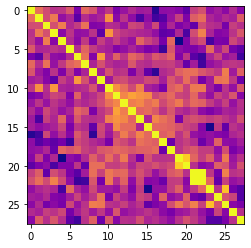

In [477]:
#Compute cosine similarities for all pairs of these 8 words
csim = cosine_similarity(wvecs)
csim[csim > 1] = 1.0
plt.imshow(csim, cmap='plasma', vmax = np.max(np.tril(csim,-1)))

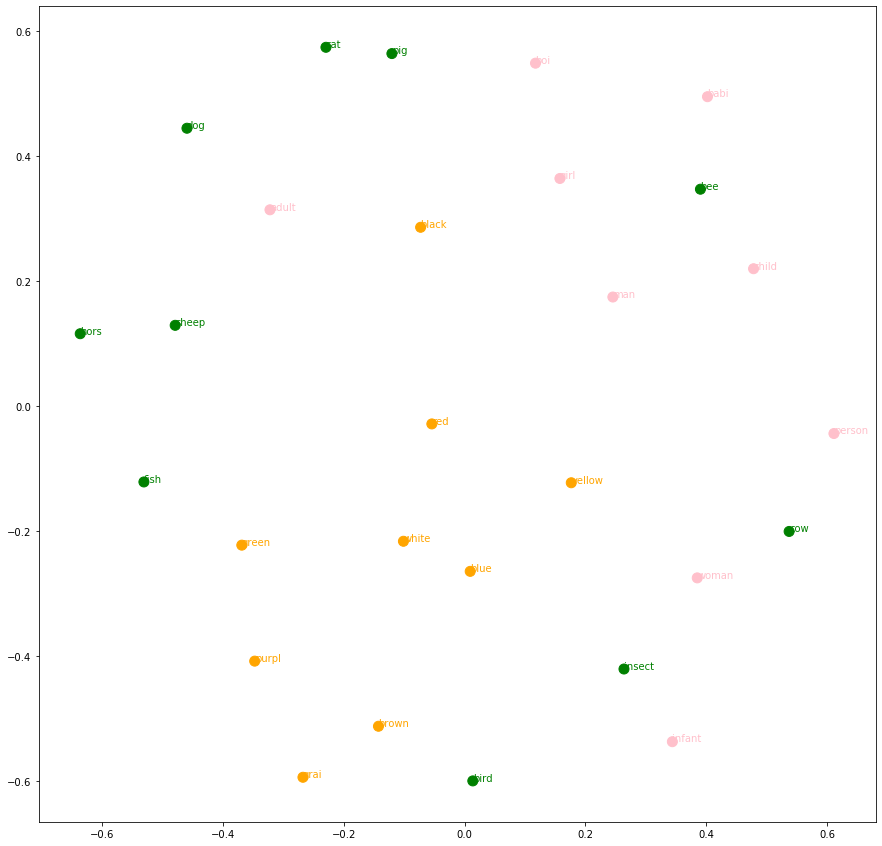

In [478]:
w2d = MDS(n_components=2, dissimilarity='precomputed').fit_transform(1 - csim) #Fit the MDS to cdist data and return 2D coordinates for each item

#Now plot the words in a 2D space with labels.
f = plt.figure(figsize=(15,15))
plt.scatter(w2d[:,0], w2d[:,1], s = 100, c = pcols)

#fig, ax = plt.subplots()#Initialize plot
#ax.scatter(w2d[:,0], w2d[:,1]) #Add scatterplot of points from 2d coordinates
for i, l in enumerate(allnames):   #Annotate each point with word labels
    plt.annotate(l, (w2d[i,0], w2d[i,1]), c = pcols[i])

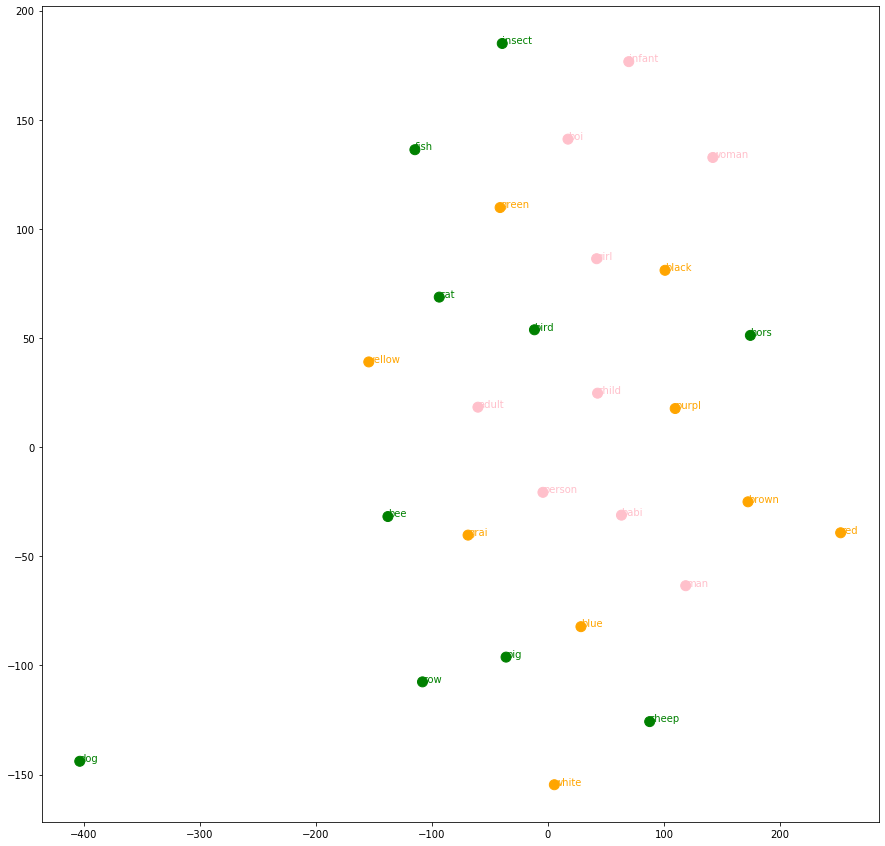

In [462]:
w2d = TSNE(n_components=2, metric='cosine').fit_transform(wvecs) #Fit the MDS to cdist data and return 2D coordinates for each item

#Now plot the words in a 2D space with labels.
f = plt.figure(figsize=(15,15))
plt.scatter(w2d[:,0], w2d[:,1], s = 100, c = pcols)

#fig, ax = plt.subplots()#Initialize plot
#ax.scatter(w2d[:,0], w2d[:,1]) #Add scatterplot of points from 2d coordinates
for i, l in enumerate(allnames):   #Annotate each point with word labels
    plt.annotate(l, (w2d[i,0], w2d[i,1]), c = pcols[i])

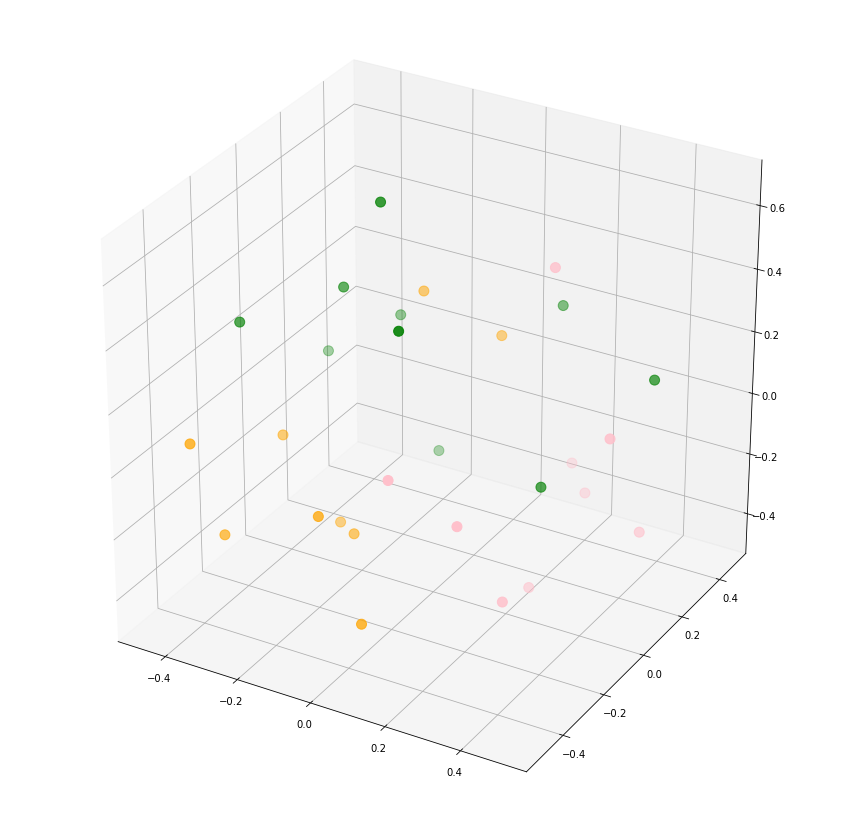

In [463]:
from mpl_toolkits import mplot3d

w3d = MDS(n_components=3,dissimilarity='precomputed').fit_transform(1 - csim) 

f = plt.figure(figsize=(15,15))
ax = f.add_subplot(projection='3d')
ax.scatter3D(w3d[:,0], w3d[:,1], w3d[:,2], s = 100, c = pcols)


In [426]:
print(inspect.getsource(Word2Vec))

class Word2Vec(utils.SaveLoad):
    def __init__(
            self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5,
            max_vocab_size=None, sample=1e-3, seed=1, workers=3, min_alpha=0.0001,
            sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=hash, epochs=5, null_word=0,
            trim_rule=None, sorted_vocab=1, batch_words=MAX_WORDS_IN_BATCH, compute_loss=False, callbacks=(),
            comment=None, max_final_vocab=None,
        ):
        """Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.

        Once you're finished training a model (=no more updates, only querying)
        store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in ``self.wv``
        to reduce memory.

        The full model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
        :meth:`~gensim.models.word2vec.Word2Vec.load` methods.

        T